In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

import scipy
from scipy import interpolate
import numpy
import matplotlib 
import matplotlib.pyplot as plt

plt.close("all")

xy_center = [2,2]   # center of the plot
radius = 2          # radius



meanR = [0.220205393075769,0.459915422873668,0.692104706945417,0.892778025691491,0.654795045889065,0.446665818526566,0.213973985904014,0.893633365535914,0.900447022611394,0.900534798008672,0.897343571519619,0.882669413198854,0.203031630135678,0.427169411205853,1,0.895221814991827,0.786056383382168,0.470205181941590,0.564294288852314,0.657387950275000,0.647974534170298,0.191296374640933]


koord = [[2,3.2],[0.8,2.6],[1.4,2.6],[2,2.6],[2.6,2.6],[3.2,2.6],[0.2,2],[0.8,2],[1.4,2],[2,2],[2.6,2],[3.2,2],[3.8,2],[0.8,1.4],[1.4,1.4],[2,1.4],[2.6,1.4],[3.2,1.4],[1.4,0.8],[2,0.8],[2.6,0.8],[2,0.2]]
print("The number of data point: "+str(len(koord)))

The number of data point: 22


In [6]:
x,y = [],[]
for i in koord:
    x.append(i[0])
    y.append(i[1])

z = meanR

# 以下是插植，使用不同方法會得到差異頗大的 Topographic
# 方法1
f = interpolate.SmoothBivariateSpline(x, y, z)
zi = f(xi, yi)
#-----
# 方法2
#f = interpolate.interp2d(x, y, z, kind='cubic')
#zi = f(xi, yi)
#-----
# 方法3
#N = 500 
#xi = numpy.linspace(-2, 6, N)
#yi = numpy.linspace(-2, 6, N)
#zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')


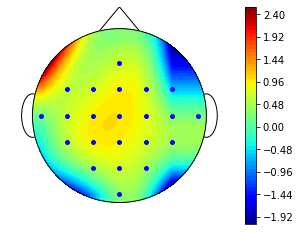

In [7]:
dr = xi[1] - xi[0]
for i in range(N):
    for j in range(N):
        r = numpy.sqrt((xi[i] - xy_center[0])**2 + (yi[j] - xy_center[1])**2)
        if (r - dr/2) > radius:
            zi[j,i] = "nan"

# make figure
fig = plt.figure()

# set aspect = 1 to make it a circle
ax = fig.add_subplot(111, aspect = 1)

# use different number of levels for the fill and the lines
CS = ax.contourf(xi, yi, zi, 60, cmap = plt.cm.jet, zorder = 1)
#ax.contour(xi, yi, zi, 15, colors = "grey", zorder = 2)

# make a color bar
cbar = fig.colorbar(CS, ax=ax)

# add the data points
# I guess there are no data points outside the head...
ax.scatter(x, y, marker = 'o', c = 'b', s = 15, zorder = 3)

# draw a circle
# change the linewidth to hide the 
circle = matplotlib.patches.Circle(xy = xy_center, radius = radius, edgecolor = "k", facecolor = "none")
ax.add_patch(circle)

# make the axis invisible 
for loc, spine in ax.spines.items():
    # use ax.spines.items() in Python 3
    spine.set_linewidth(0)

# remove the ticks
ax.set_xticks([])
ax.set_yticks([])

# Add some body parts. Hide unwanted parts by setting the zorder low
# add two ears
circle = matplotlib.patches.Ellipse(xy = [0,2], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
ax.add_patch(circle)
circle = matplotlib.patches.Ellipse(xy = [4,2], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
ax.add_patch(circle)
# add a nose
xy = [[1.5,3.9], [2,4.5],[2.5,3.9]]
polygon = matplotlib.patches.Polygon(xy = xy, edgecolor = "k", facecolor = "w", zorder = 0)
ax.add_patch(polygon) 

# set axes limits
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)

plt.show() 


## Reference
[](https://stackoverflow.com/questions/15361143/how-to-fit-result-of-matplotlib-pyplot-contourf-into-circle)